# Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd

df = pd.read_csv('city_lifestyle_dataset.csv')
df = df.drop(columns=['city_name', 'country'])

numeric_cols = [
    'population_density', 'avg_income', 
    'internet_penetration', 'avg_rent', 
    'air_quality_index', 'public_transport_score',
    'happiness_score', 'green_space_ratio'
    ]

# Дескриптивный анализ

In [23]:
print("Размерность:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

Размерность: (300, 8)

Типы данных:
population_density          int64
avg_income                  int64
internet_penetration      float64
avg_rent                    int64
air_quality_index           int64
public_transport_score    float64
happiness_score           float64
green_space_ratio         float64
dtype: object

Пропущенные значения:
population_density        0
avg_income                0
internet_penetration      0
avg_rent                  0
air_quality_index         0
public_transport_score    0
happiness_score           0
green_space_ratio         0
dtype: int64


In [24]:
print("\nСтатистическое описание:")
print(df.describe())

print("Мода population_density:", df['population_density'].mode()[0])
print("Мода internet_penetration:", df['internet_penetration'].mode()[0])
print("Мода avg_rent:", df['avg_rent'].mode()[0])
print("Мода air_quality_index:", df['air_quality_index'].mode()[0])
print("Мода public_transport_score:", df['public_transport_score'].mode()[0])
print("Мода happiness_score:", df['happiness_score'].mode()[0])
print("Мода green_space_ratio:", df['green_space_ratio'].mode()[0])


Статистическое описание:
       population_density   avg_income  internet_penetration     avg_rent  air_quality_index  public_transport_score  happiness_score  green_space_ratio
count          300.000000   300.000000            300.000000   300.000000         300.000000              300.000000       300.000000         300.000000
mean          3944.843333  2827.200000             74.305333  1002.766667          71.246667               55.717333         6.644000          33.993333
std           2982.566777  1201.163939             17.014492   456.282066          25.344961               14.712549         1.685864           9.434067
min            100.000000   480.000000             34.000000   170.000000          22.000000               15.000000         2.500000           2.000000
25%           1830.000000  1907.500000             64.400000   640.000000          54.000000               46.075000         5.300000          28.225000
50%           3083.500000  2810.000000             75.00

На основе представленного статистического описания датасета из 300 городов можно сделать следующие ключевые выводы о качестве жизни и городской инфраструктуре:

1. Благосостояние и стоимость жизни
Доходы: Средний доход составляет 2827$, при этом наблюдается значительный разброс (от 480$ до 5720$). Тот факт, что среднее и медиана (2810$) практически совпадают, говорит о симметричном распределении доходов в выборке без экстремальных перекосов.

Аренда: Средняя стоимость жилья — 1002$. Примечательно, что мода (самое частое значение) аренды составляет всего 350$, что значительно ниже среднего. Это указывает на наличие большого сегмента бюджетного жилья, несмотря на наличие дорогих вариантов (до 2430$).

2. Демография и экология
Плотность населения: Средняя плотность составляет 3944 чел/км², но здесь наблюдается огромная вариативность (std = 2982). Есть как очень просторные города (100 чел/км²), так и сверхплотные мегаполисы (14427 чел/км²).

Качество воздуха (AQI): Среднее значение 71.2 соответствует уровню «умеренного» качества. Однако максимальное значение 146 приближается к категории «нездорового воздуха для чувствительных групп».

Озеленение: В среднем города на 34% состоят из зеленых зон. Это хороший показатель для урбанизированных территорий.

3. Технологии и транспорт
Интернет: Уровень проникновения интернета высокий — в среднем 74.3%. Мода составляет 100%, что говорит о том, что в значительном количестве городов доступ к сети является всеобщим.

Транспорт: Средний балл транспортной системы — 55.7 из 100. Это свидетельствует о среднем уровне развития инфраструктуры; города в выборке не являются эталонами мобильности, но и не лишены общественного транспорта вовсе.

4. Уровень счастья (Главная метрика)
Средний уровень счастья составляет 6.64 из 10.

Аномалия моды: Самое частое значение индекса счастья — 8.5. Это крайне интересный показатель: несмотря на средние цифры, в датасете очень много городов с максимально высоким уровнем удовлетворенности жизнью. Половина городов (медиана) имеет балл 6.9 и выше.

## Оценка распределения переменных (близость к нормальному) с использованием визуализации (гистограммы)

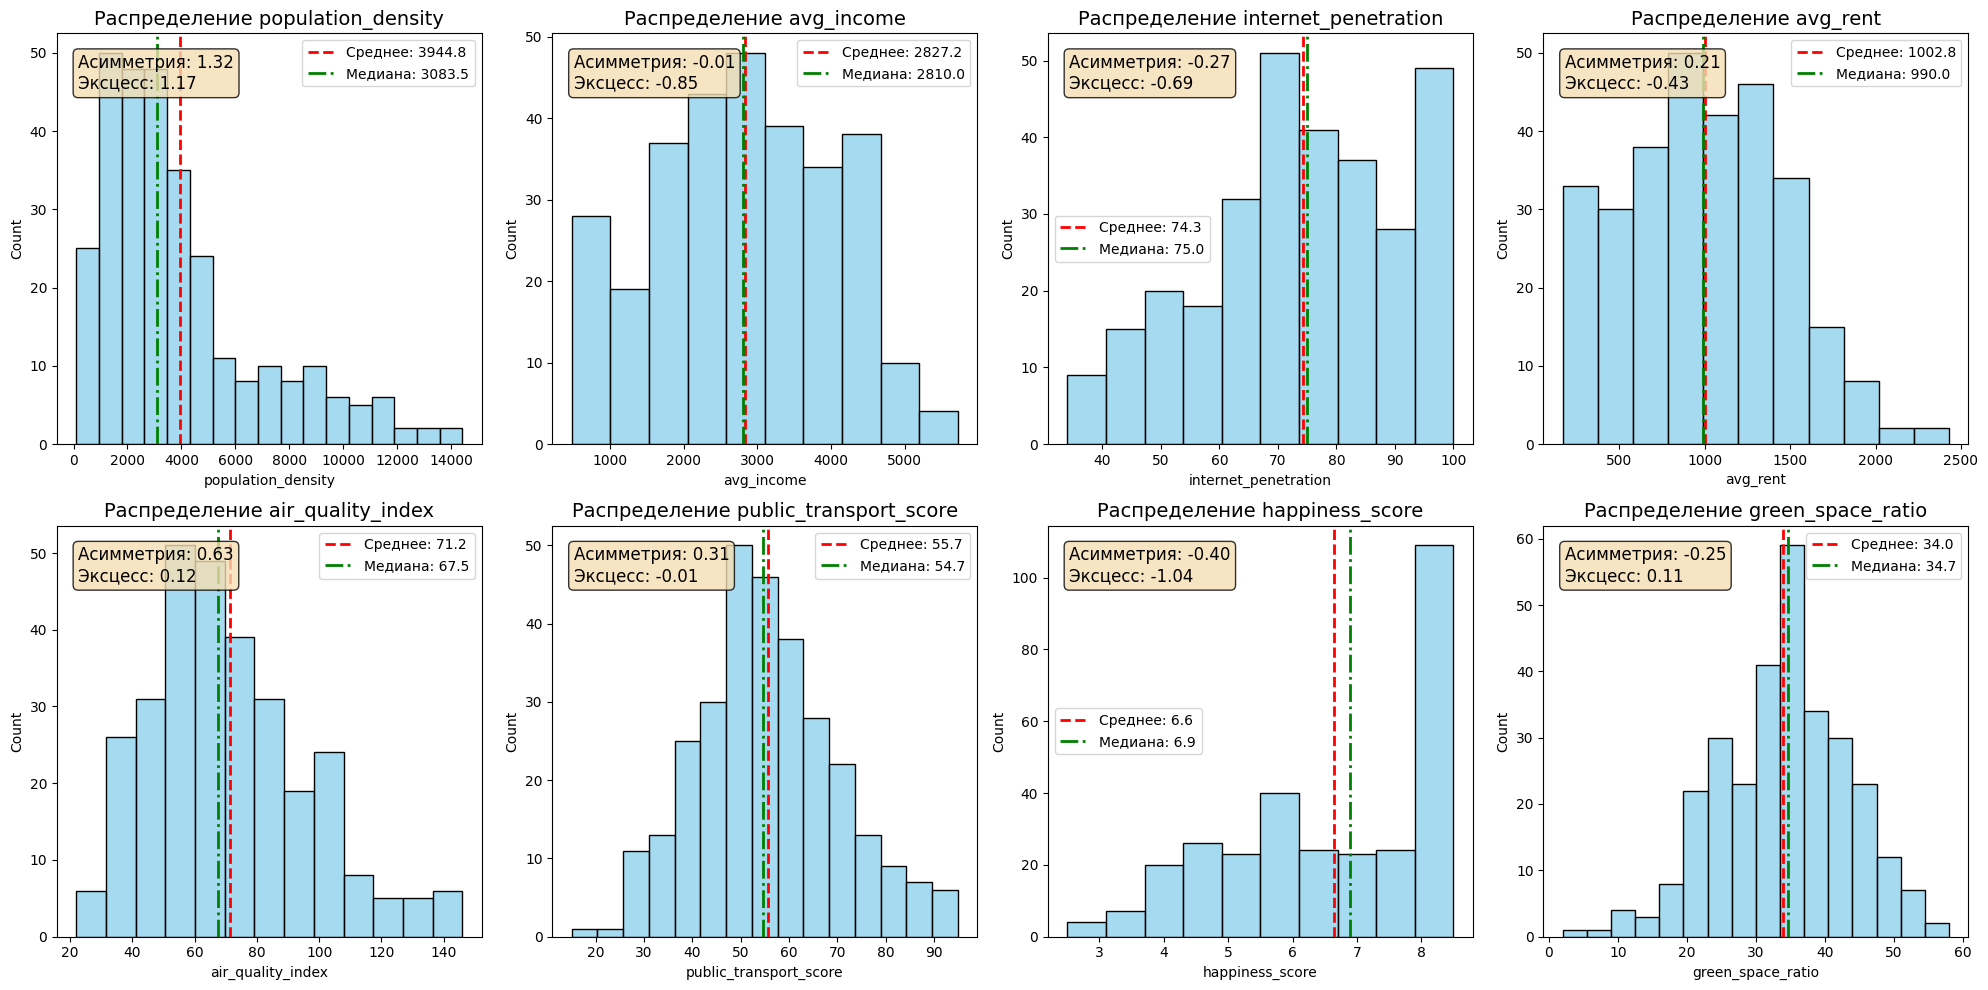

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data = df[col]
    
    mean_val = data.mean()
    median_val = data.median()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    
    sns.histplot(data, ax=axes[i], color='skyblue', edgecolor='black')
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Медиана: {median_val:.1f}')
    
    stats_text = f'Асимметрия: {skew_val:.2f}\nЭксцесс: {kurt_val:.2f}'
    axes[i].text(0.05, 0.95, stats_text,
                 transform=axes[i].transAxes,
                 fontsize=12,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[i].set_title(f'Распределение {col}', fontsize=14)
    axes[i].legend()

plt.tight_layout()
plt.show()

## Ящики с усами

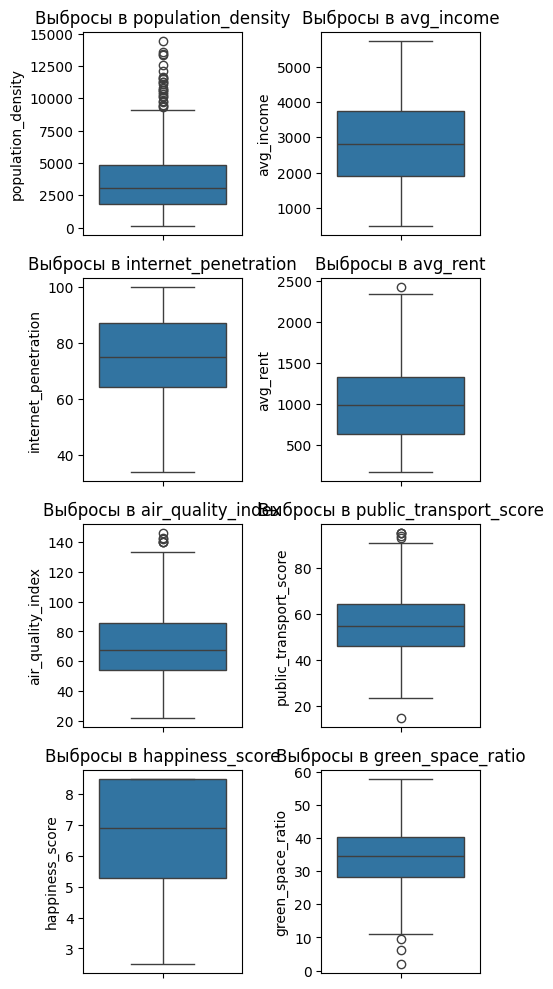

In [34]:
plt.figure(figsize=(5, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Выбросы в {col}')
plt.tight_layout()
plt.show()

                        population_density  avg_income  internet_penetration  avg_rent  air_quality_index  public_transport_score  happiness_score  green_space_ratio
population_density                1.000000   -0.187404             -0.067352 -0.200738           0.659115                0.282088        -0.399571          -0.545729
avg_income                       -0.187404    1.000000              0.825187  0.942277          -0.481068                0.577541         0.857973           0.038687
internet_penetration             -0.067352    0.825187              1.000000  0.781348          -0.376268                0.509431         0.769926           0.012067
avg_rent                         -0.200738    0.942277              0.781348  1.000000          -0.462528                0.538061         0.815334           0.030237
air_quality_index                 0.659115   -0.481068             -0.376268 -0.462528           1.000000               -0.070747        -0.737528          -0.376227
publ

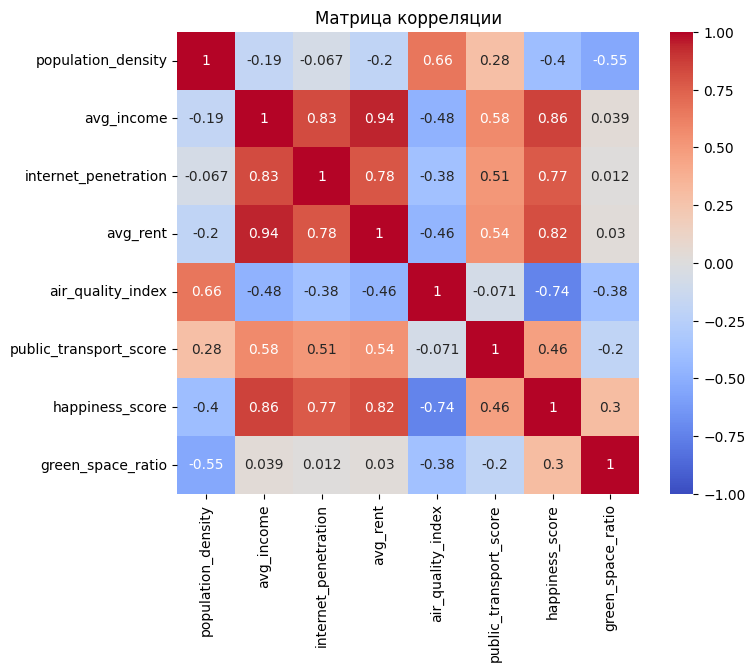

In [60]:
corr_matrix = df.corr()
print(corr_matrix)
# Визуализация матрицы корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Матрица корреляции')
plt.show()

В данных есть "триада" почти признаков с сильной мультиколлинеарностью, с самыми большими значениями:
* avg_income и avg_rent ($r = 0.94$)
* avg_income и happiness_score ($r = 0.86$)
* avg_rent и happiness_score ($r = 0.82$)

Необходимо избавиться от мультиколлинеарности, используем VIF

# VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numeric_cols].dropna()

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["feature"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

# Цикл автоматического удаления признаков с высоким VIF
thresh = 10.0  # Порог (можно снизить до 5 для большей чистоты)
while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data['VIF'].max()
    
    if max_vif > thresh:
        # Находим признак с максимальным VIF
        feature_to_drop = vif_data.sort_values('VIF', ascending=False)['feature'].iloc[0]
        print(f"Удаляем '{feature_to_drop}' с VIF = {max_vif:.2f}")
        X = X.drop(columns=[feature_to_drop])
    else:
        break

print("\nИтоговый список признаков:")
print(X.columns.tolist())
print("\nФинальные значения VIF:")
print(calculate_vif(X))

Удаляем 'happiness_score' с VIF = 120.88
Удаляем 'avg_income' с VIF = 77.50
Удаляем 'internet_penetration' с VIF = 44.13
Удаляем 'public_transport_score' с VIF = 24.42
Удаляем 'air_quality_index' с VIF = 12.87

Итоговый список признаков:
['population_density', 'avg_rent', 'green_space_ratio']

Финальные значения VIF:
              feature       VIF
0  population_density  1.962382
1            avg_rent  4.687172
2   green_space_ratio  4.743260


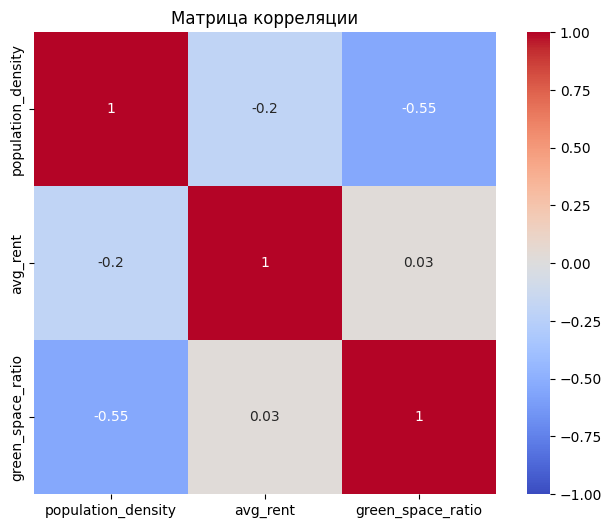

In [38]:
corr_matrix = X.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Матрица корреляции')
plt.show()

## Стандартизация

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
numeric_cols = ['population_density', 'avg_rent', 'green_space_ratio']
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

## Матрица диаграмм рассеивания

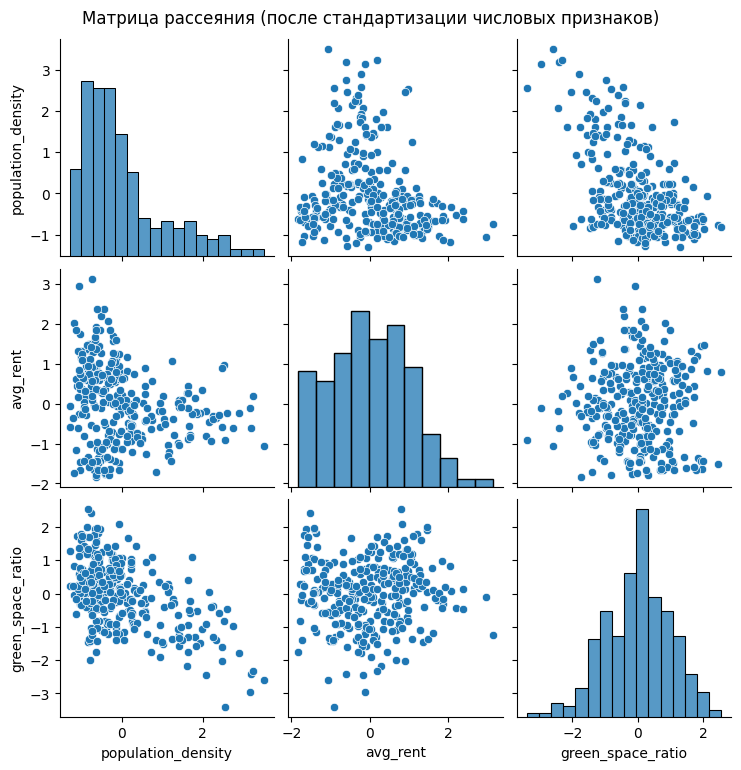

In [41]:
sns.pairplot(X_scaled)
plt.suptitle('Матрица рассеяния (после стандартизации числовых признаков)', y=1.02)
plt.show()

## Подбор оптимального значения k для K-Means, исследовать влияние параметров

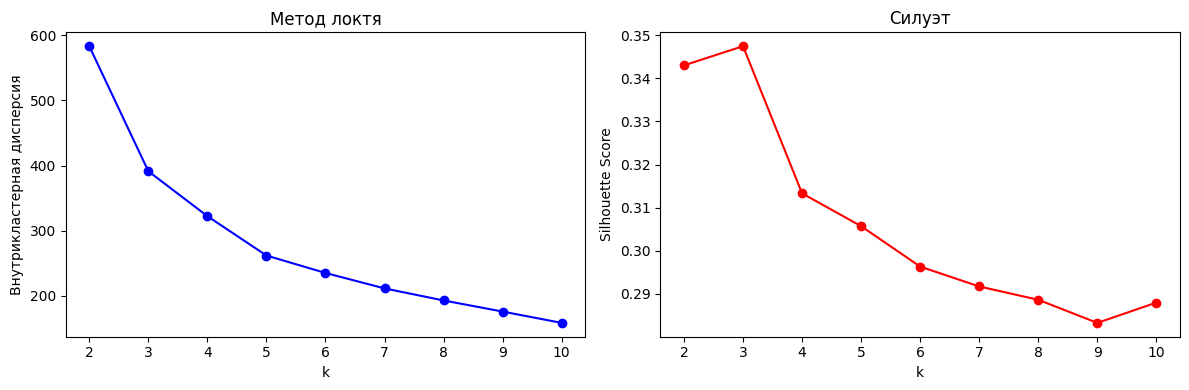

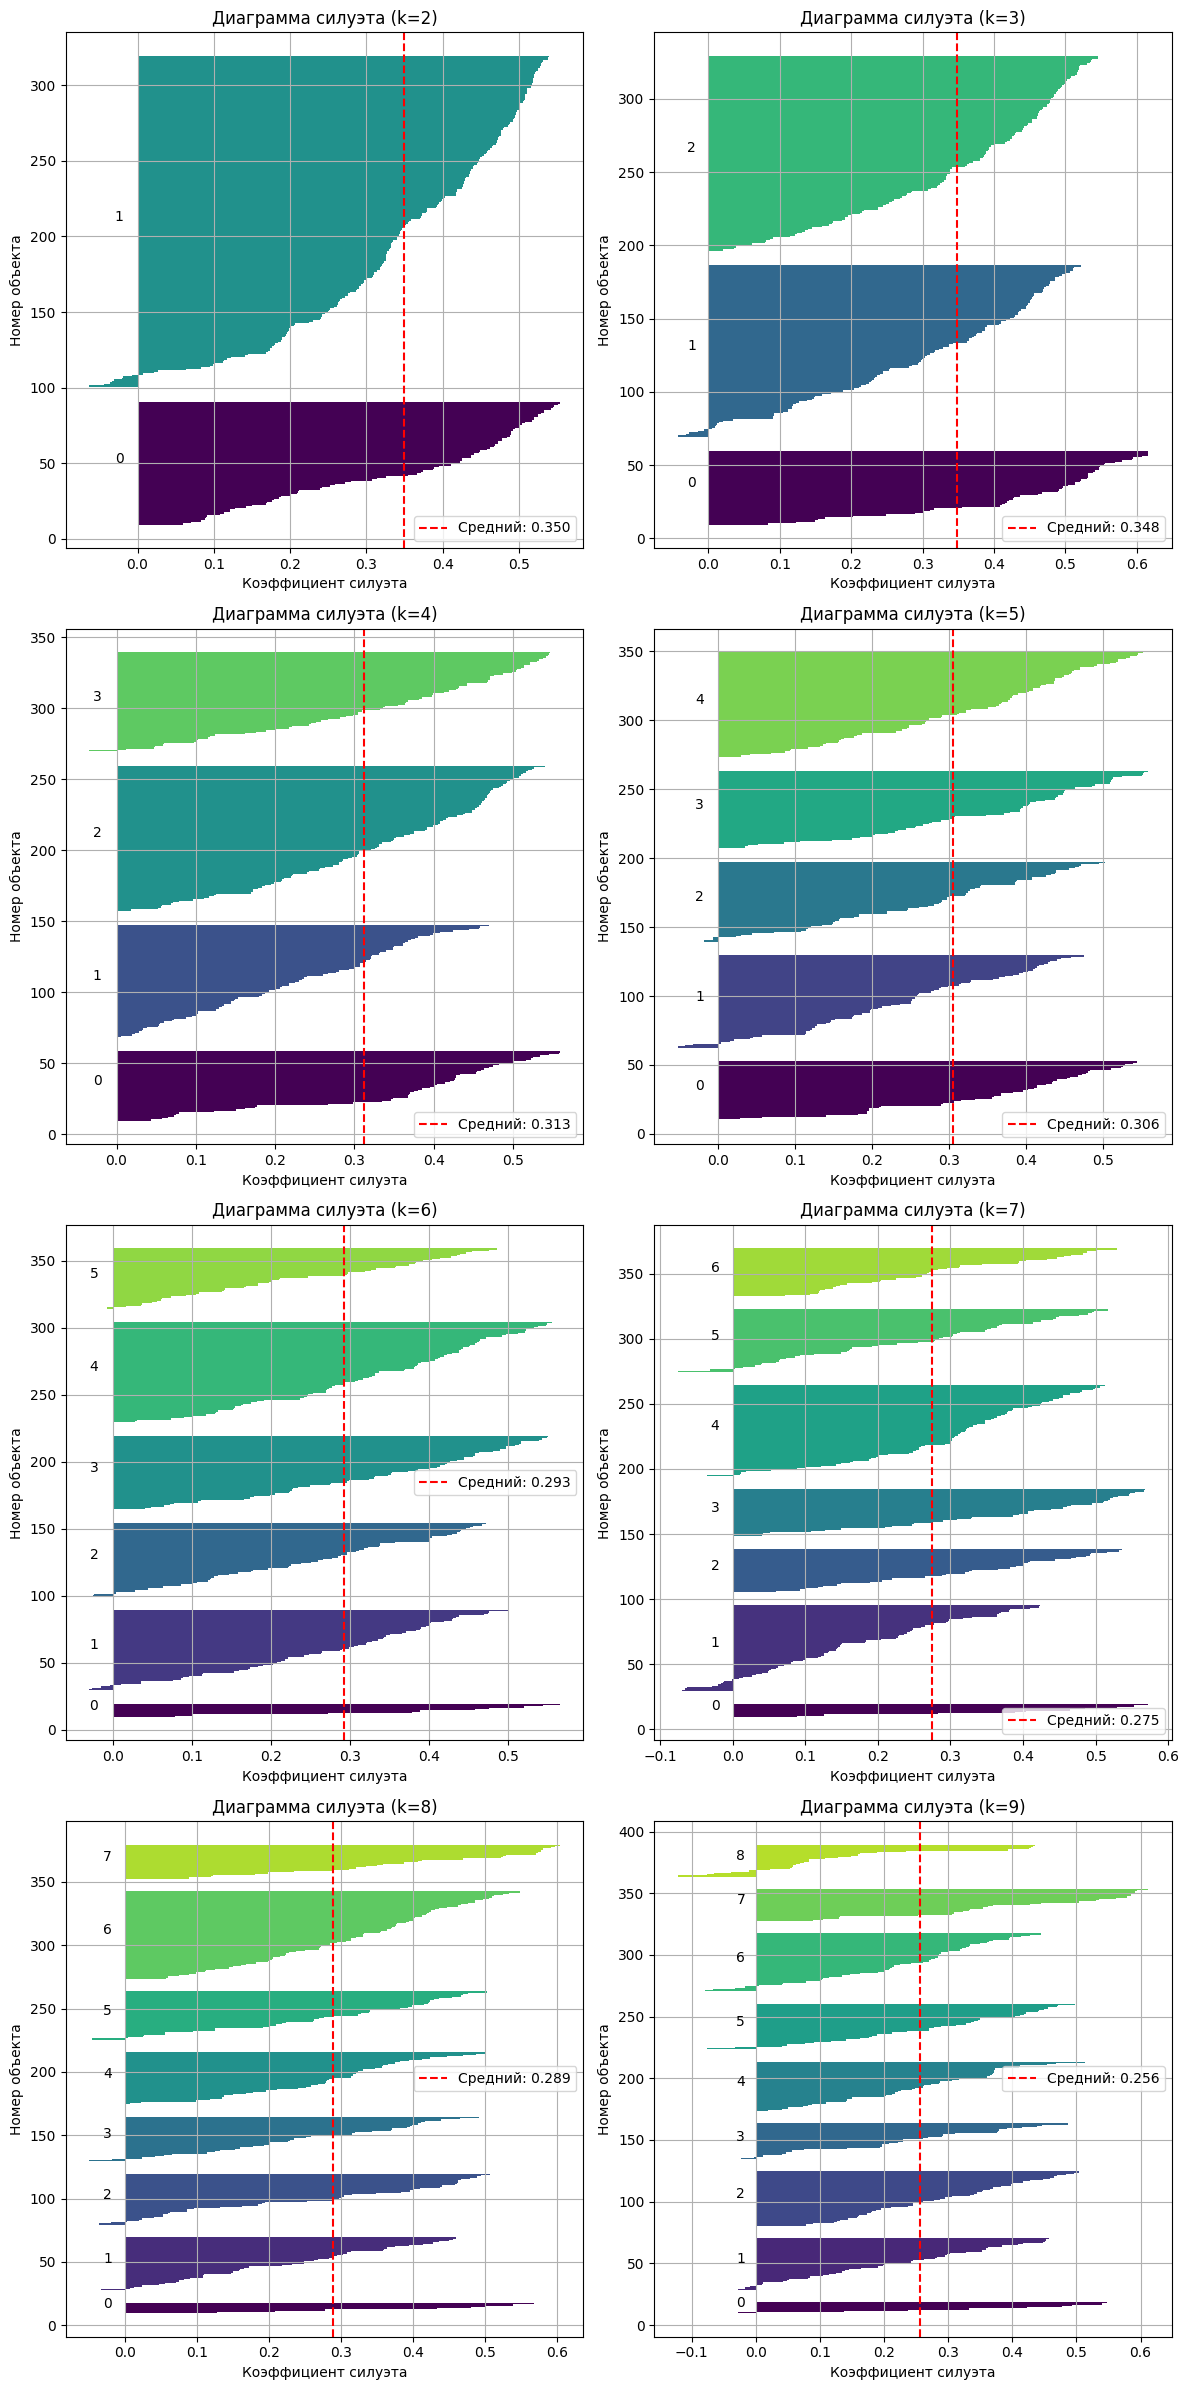

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(K_range, inertias, 'bo-')
ax[0].set_title('Метод локтя')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Внутрикластерная дисперсия')

ax[1].plot(K_range, silhouettes, 'ro-')
ax[1].set_title('Силуэт')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

k_range = range(2, 10)
n_clusters = len(k_range)
n_cols = 2
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for idx, k in enumerate(k_range):
    ax = axes[idx]

    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals,
                height=1.0, edgecolor='none', color=color)

        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    avg_silhouette = silhouette_score(X_scaled, cluster_labels)
    ax.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Средний: {avg_silhouette:.3f}")

    ax.set_xlabel("Коэффициент силуэта")
    ax.set_ylabel("Номер объекта")
    ax.set_title(f"Диаграмма силуэта (k={k})")
    ax.legend()
    ax.grid(True)

for idx in range(n_clusters, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### Анализ качества кластеризации методом K-means
При использовании метода локтя наблюдается характерное снижение инерции (сумм квадратов расстояний до центров) при увеличении числа групп. Ключевой излом графика — точка «локтя» — четко фиксируется при k = 3. Именно на этом значении темп падения инерции резко замедляется: переход от двух к трем кластерам дает существенное улучшение компактности, в то время как дальнейшее дробление (до 4 и более) уже не приносит значимого выигрыша в объяснении структуры данных. Таким образом, метод локтя однозначно указывает на оптимальность k = 3.

Анализ коэффициента силуэта, оценивающего плотность и разделимость кластеров, подтверждает этот вывод. На графике метрики наблюдается выраженный пик при k = 3, что свидетельствует о достижении наилучшего баланса между внутренней однородностью групп и их взаимной удаленностью. При k = 2 структура данных еще недостаточно раскрыта, а начиная с k = 4 значение силуэта начинает плавно снижаться, что говорит о появлении искусственно разделенных, «перекрывающихся» сегментов. Согласованность метода локтя и максимума силуэта на отметке 3 делает этот выбор математически надежным.

## Подбор оптимального значения k для GMM, исследовать влияние параметров

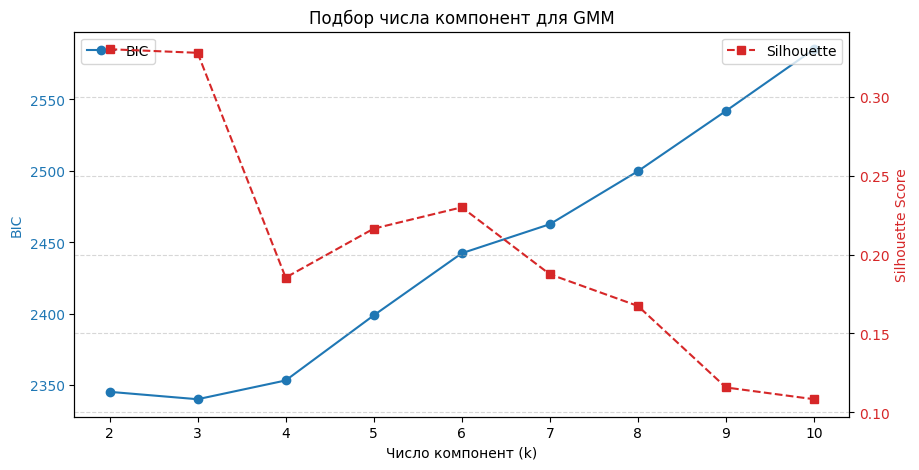

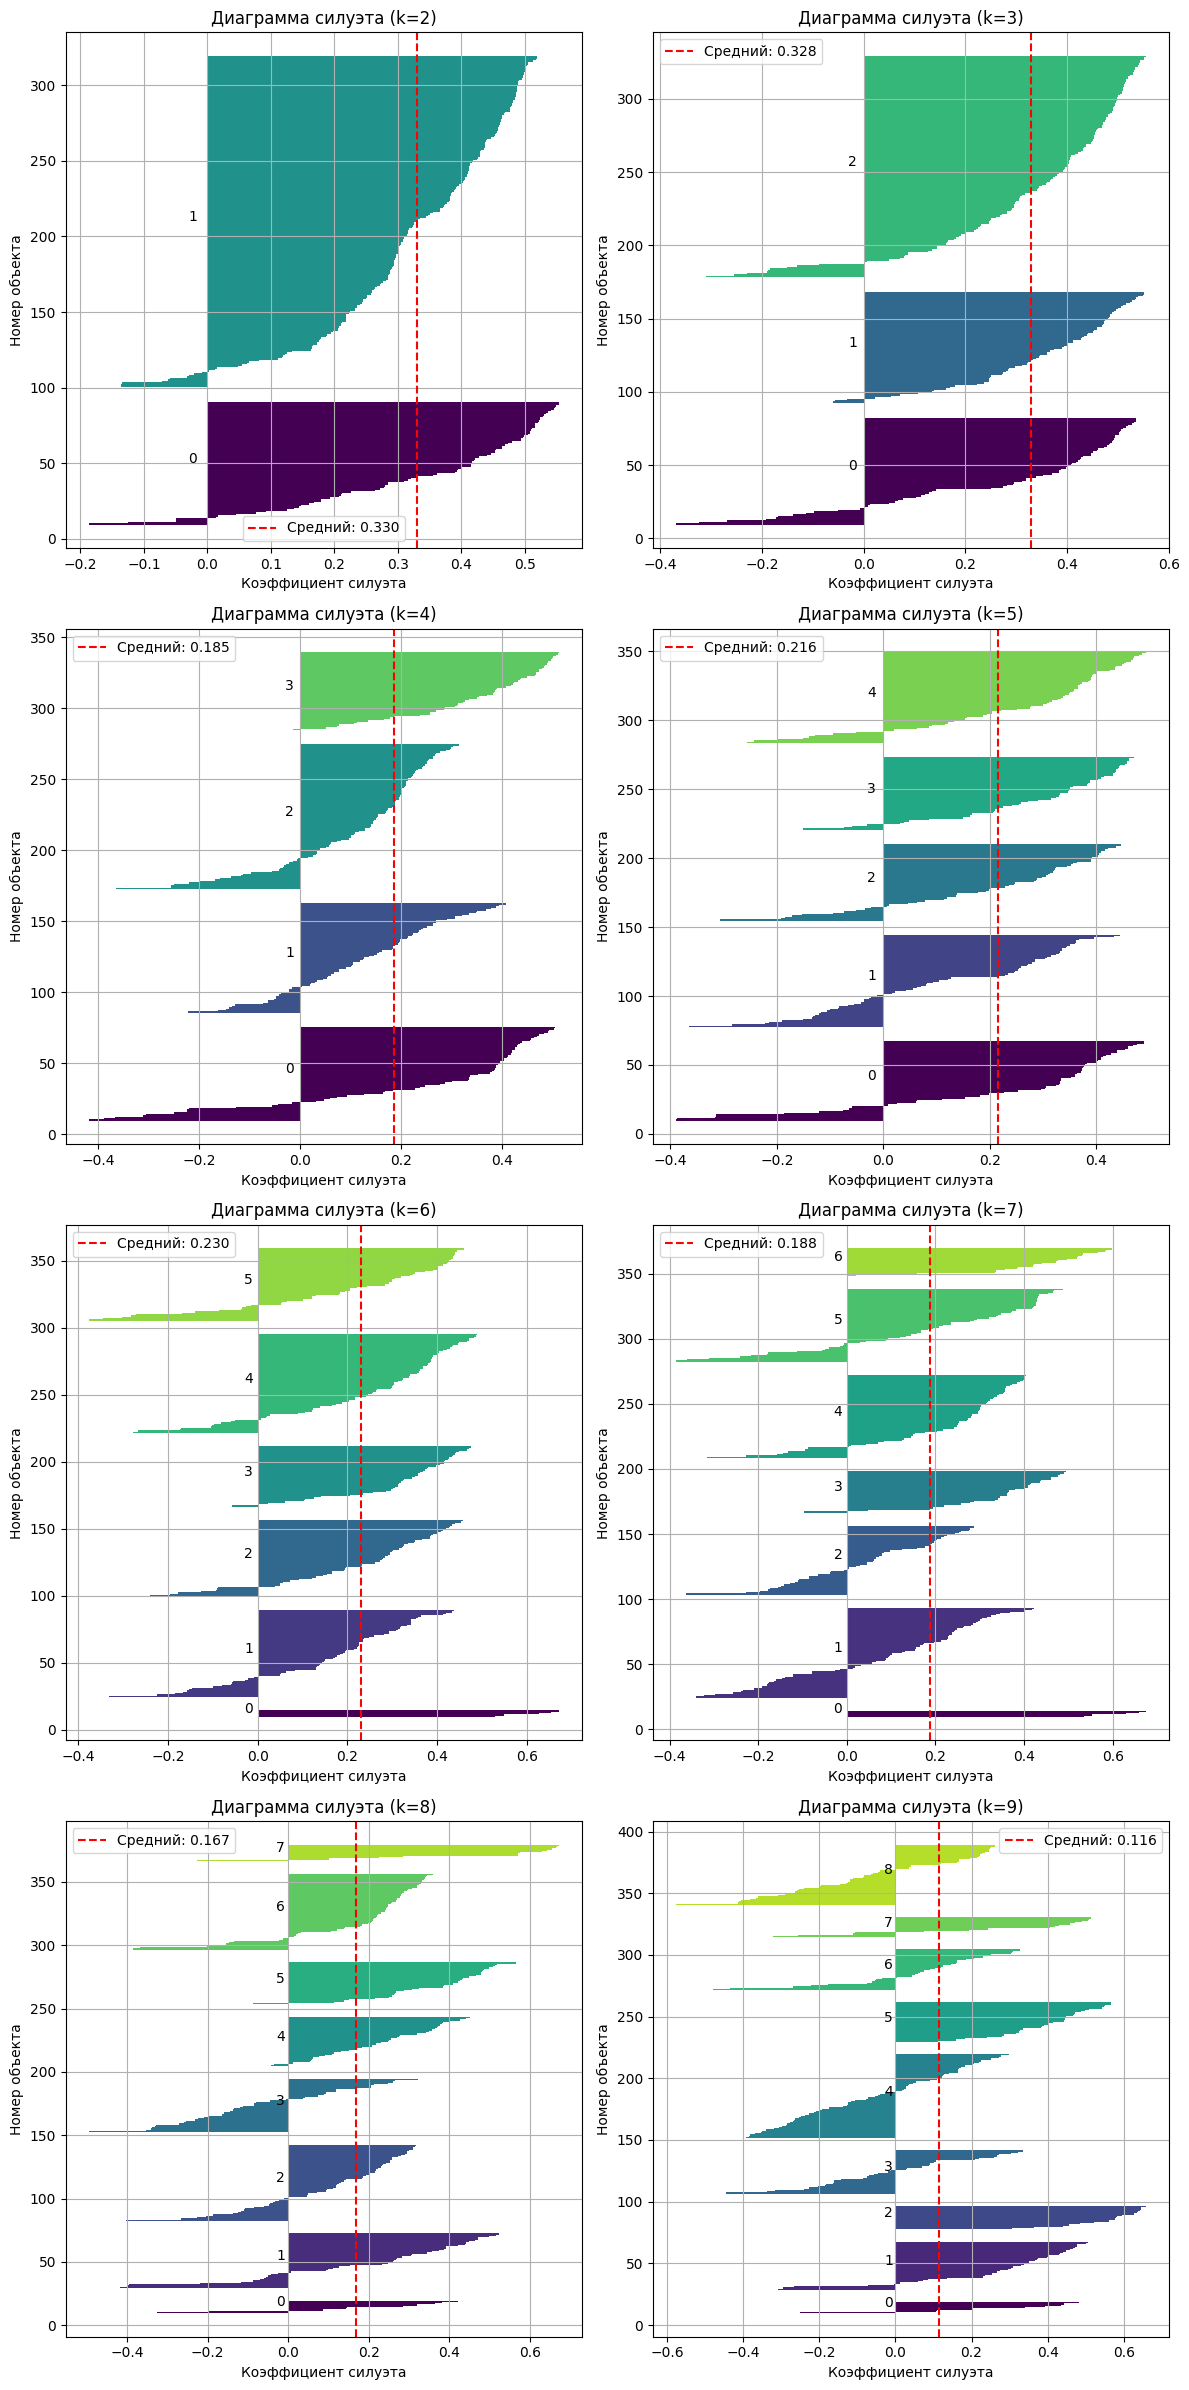

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(2, 11)
bic_scores = []
silhouettes_gmm = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    labels_gmm = gmm.predict(X_scaled)
    silhouettes_gmm.append(silhouette_score(X_scaled, labels_gmm))

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Число компонент (k)')
ax1.set_ylabel('BIC', color=color)
ax1.plot(n_components_range, bic_scores, 'o-', color=color, label='BIC')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(n_components_range, silhouettes_gmm, 's--', color=color, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Подбор числа компонент для GMM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

k_range = range(2, 10)
n_clusters = len(k_range)
n_cols = 2
n_rows = int(np.ceil(n_clusters / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten() 

for idx, k in enumerate(k_range):
    ax = axes[idx]

    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    cluster_labels = gmm.fit_predict(X_scaled)

    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals,
                height=1.0, edgecolor='none', color=color)

        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    avg_silhouette = silhouette_score(X_scaled, cluster_labels)
    ax.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Средний: {avg_silhouette:.3f}")

    ax.set_xlabel("Коэффициент силуэта")
    ax.set_ylabel("Номер объекта")
    ax.set_title(f"Диаграмма силуэта (k={k})")
    ax.legend()
    ax.grid(True)

for idx in range(n_clusters, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Анализ качества кластеризации методом GMM с использованием критерия BIC:

Исследование влияния числа компонент в модели гауссовых смесей (GMM) показало, что наиболее устойчивая структура данных достигается при k=3. Информационный критерий Байеса (BIC), который оценивает баланс между качеством подгонки и сложностью модели, достигает своего глобального минимума именно при трех компонентах. Это означает, что с точки зрения информационной экономии модель с k=3 является наиболее эффективной: она описывает распределение данных максимально полно, не допуская избыточного усложнения.Анализ коэффициента силуэта подтверждает этот вывод. Максимальное значение метрики фиксируется на отметке k=3, что свидетельствует о наилучшем разделении объектов на группы.

Анализ диаграмм силуэта наглядно демонстрирует превосходство трехкластерной модели. При k=3 все три компоненты имеют широкие, плотные «ленты», выходящие далеко за линию среднего значения. Это говорит о высокой внутренней однородности каждой группы. Средний силуэт при этом достигает 0.328 — самого высокого показателя среди всех протестированных вариантов. Визуально группы выглядят компактными и хорошо изолированными друг от друга.

## Применение методов

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

print("K-means: найдено кластеров =", len(set(labels_kmeans)))
print("GMM: найдено кластеров =", len(set(labels_gmm)))

K-means: найдено кластеров = 3
GMM: найдено кластеров = 3


## Метрики качества для обоих методов

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

def print_metrics(name, labels, X):
    if len(set(labels)) < 2:
        print(f"{name}: недостаточно кластеров для оценки")
        return
    print(f"\n{name} — Внутренние метрики:")
    print(f"Silhouette Score: {silhouette_score(X, labels):.3f}")
    print(f"Calinski-Harabasz: {calinski_harabasz_score(X, labels):.1f}")
    print(f"Davies-Bouldin: {davies_bouldin_score(X, labels):.3f}")

print_metrics("K-means", labels_kmeans, X_scaled)
print_metrics("GMM", labels_gmm, X_scaled)


print("\n==================================================АНАЛИЗ K-MEANS (k=3)==================================================")

unique_labels, counts = np.unique(labels_kmeans, return_counts=True)
label_counts = dict(zip(unique_labels, counts))
total = len(labels_kmeans)


cluster_labels = sorted(unique_labels)
print(f"\nСтруктура кластеров:")
for lbl in cluster_labels:
    size = label_counts[lbl]
    pct = size / total * 100
    print(f"Компонента {lbl}: {size} точек ({pct:.1f}%)")

centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=numeric_cols)
centers_df.index = [f'Кластер {i}' for i in range(3)]
print("\nЦентры кластеров (в исходных единицах):")
print(centers_df.round(1))


K-means — Внутренние метрики:
Silhouette Score: 0.347
Calinski-Harabasz: 193.0
Davies-Bouldin: 1.042

GMM — Внутренние метрики:
Silhouette Score: 0.328
Calinski-Harabasz: 165.6
Davies-Bouldin: 1.060

==================================================АНАЛИЗ K-MEANS (k=3)==================================================

Структура кластеров:
Компонента 0: 112 точек (37.3%)
Компонента 1: 55 точек (18.3%)
Компонента 2: 133 точек (44.3%)

Центры кластеров (в исходных единицах):
           population_density  avg_rent  green_space_ratio
Кластер 0              3311.1     586.1               35.8
Кластер 1              9132.0     880.4               22.8
Кластер 2              2333.5    1404.3               37.1


In [64]:
print("\nВнутрикластерная компактность (по кластерам):")
intra_distances = []
for i in range(3):
    cluster_points = X_scaled[labels_kmeans == i]
    center = centers_scaled[i].reshape(1, -1)
    dists = cdist(cluster_points, center, metric='euclidean').flatten()
    mean_dist = np.mean(dists)
    std_dist = np.std(dists)
    intra_distances.append(mean_dist)
    print(f"Кластер {i}: среднее = {mean_dist:.3f}, std = {std_dist:.3f}")

avg_intra = np.mean(intra_distances)
print(f"Среднее внутрикластерное расстояние: {avg_intra:.3f}")

inter_distances = cdist(centers_scaled, centers_scaled, metric='euclidean')
np.fill_diagonal(inter_distances, np.inf)
min_inter = np.min(inter_distances)
i_upper, j_upper = np.triu_indices_from(inter_distances, k=1)
max_inter = np.max(inter_distances[i_upper, j_upper])
avg_inter = np.mean(inter_distances[inter_distances != np.inf])

print(f"\nМежкластерные расстояния (между центрами):")
print(f"Минимальное: {min_inter:.3f}")
print(f"Максимальное: {max_inter:.3f}")
print(f"Среднее: {avg_inter:.3f}")

compactness_ratio = avg_intra / min_inter
print(f"\nОтношение (внутри / между мин.): {compactness_ratio:.3f}")
if compactness_ratio < 0.5:
    print("Кластеры компактны и хорошо разделены!")
elif compactness_ratio < 1.0:
    print("Умеренная компактность. Кластеры различимы.")
else:
    print("Кластеры пересекаются или слабо разделены.")


Внутрикластерная компактность (по кластерам):
Кластер 0: среднее = 1.058, std = 0.431
Кластер 1: среднее = 1.087, std = 0.509
Кластер 2: среднее = 1.013, std = 0.470
Среднее внутрикластерное расстояние: 1.053

Межкластерные расстояния (между центрами):
Минимальное: 1.831
Максимальное: 2.976
Среднее: 2.429

Отношение (внутри / между мин.): 0.575
Умеренная компактность. Кластеры различимы.


In [65]:
print("\n==================================================АНАЛИЗ GMM (k=3)==================================================")

unique_labels, counts = np.unique(labels_gmm, return_counts=True)
label_counts = dict(zip(unique_labels, counts))

total = len(labels_gmm)

cluster_labels = sorted(unique_labels)
print(f"\nСтруктура кластеров:")
for lbl in cluster_labels:
    size = label_counts[lbl]
    pct = size / total * 100
    print(f"Компонента {lbl}: {size} точек ({pct:.1f}%)")

centers_gmm_scaled = gmm.means_ 
centers_gmm_original = scaler.inverse_transform(centers_gmm_scaled)
centers_gmm_df = pd.DataFrame(centers_gmm_original, 
                              columns=numeric_cols,
                              index=[f'Компонента {i}' for i in range(3)])
print(f"\nЦентры компонент GMM (в исходных единицах):")
print(centers_gmm_df.round(1))
print(f"\nВнутрикомпонентная компактность (по компонентам):")
intra_gmm = []
for i in range(3):
    component_points = X_scaled[labels_gmm == i]
    center = centers_gmm_scaled[i].reshape(1, -1)
    dists = cdist(component_points, center, metric='euclidean').flatten()
    mean_dist = np.mean(dists) if len(dists) > 0 else 0
    std_dist = np.std(dists) if len(dists) > 1 else 0
    intra_gmm.append(mean_dist)
    print(f"Компонента {i}: среднее = {mean_dist:.3f}, std = {std_dist:.3f}")

avg_intra_gmm = np.mean(intra_gmm)
print(f"Среднее внутрикомпонентное расстояние: {avg_intra_gmm:.3f}")

inter_gmm = cdist(centers_gmm_scaled, centers_gmm_scaled, metric='euclidean')
i_upper, j_upper = np.triu_indices_from(inter_gmm, k=1)
min_inter_gmm = np.min(inter_gmm[i_upper, j_upper])
max_inter_gmm = np.max(inter_gmm[i_upper, j_upper])
avg_inter_gmm = np.mean(inter_gmm[i_upper, j_upper])

print(f"\nМежкомпонентные расстояния (между центрами):")
print(f"Минимальное: {min_inter_gmm:.3f}")
print(f"Максимальное: {max_inter_gmm:.3f}")
print(f"Среднее: {avg_inter_gmm:.3f}")


==================================================АНАЛИЗ GMM (k=3)==================================================

Структура кластеров:
Компонента 0: 73 точек (24.3%)
Компонента 1: 76 точек (25.3%)
Компонента 2: 151 точек (50.3%)

Центры компонент GMM (в исходных единицах):
              population_density  avg_rent  green_space_ratio
Компонента 0              8077.7     854.3               26.8
Компонента 1              3024.2     492.0               35.6
Компонента 2              2312.4    1326.5               36.8

Внутрикомпонентная компактность (по компонентам):
Компонента 0: среднее = 1.226, std = 0.577
Компонента 1: среднее = 1.023, std = 0.477
Компонента 2: среднее = 1.038, std = 0.471
Среднее внутрикомпонентное расстояние: 1.096

Межкомпонентные расстояния (между центрами):
Минимальное: 1.852
Максимальное: 2.441
Среднее: 2.129


In [66]:
compactness_ratio_gmm = avg_intra_gmm / min_inter_gmm
print(f"\nОтношение (внутри / между мин.): {compactness_ratio_gmm:.3f}")
if compactness_ratio_gmm < 0.5:
    print("Компоненты компактны и хорошо разделены!")
elif compactness_ratio_gmm < 1.0:
    print("Умеренная компактность. Компоненты различимы.")
else:
    print("Компоненты пересекаются или слабо разделены.")


print("\nСРАВНЕНИЕ МЕТРИК:")
print(f"{'Метрика':<20} {'K-means':<10} {'GMM':<10} {'Разница':<10}")
print("-" * 50)
sil_km = silhouette_score(X_scaled, labels_kmeans)
sil_gmm = silhouette_score(X_scaled, labels_gmm)
ch_km = calinski_harabasz_score(X_scaled, labels_kmeans)
ch_gmm = calinski_harabasz_score(X_scaled, labels_gmm)
db_km = davies_bouldin_score(X_scaled, labels_kmeans)
db_gmm = davies_bouldin_score(X_scaled, labels_gmm)

print(f"{'Silhouette':<20} {sil_km:<10.3f} {sil_gmm:<10.3f} {sil_km - sil_gmm:+.3f}")
print(f"{'Calinski-Harabasz':<20} {ch_km:<10.1f} {ch_gmm:<10.1f} {ch_km - ch_gmm:+.1f}")
print(f"{'Davies-Bouldin':<20} {db_km:<10.3f} {db_gmm:<10.3f} {db_km - db_gmm:+.3f}")


Отношение (внутри / между мин.): 0.592
Умеренная компактность. Компоненты различимы.

СРАВНЕНИЕ МЕТРИК:
Метрика              K-means    GMM        Разница   
--------------------------------------------------
Silhouette           0.347      0.328      +0.019
Calinski-Harabasz    193.0      165.6      +27.4
Davies-Bouldin       1.042      1.060      -0.018


In [56]:
from scipy.stats import f_oneway

# Список названий признаков (в том же порядке, что и в X_scaled)
feature_names = numeric_cols
X_original = scaler.inverse_transform(X_scaled)  # Возвращаем данные в исходный масштаб

def anova_feature_importance(labels, X_original, feature_names):
    print("\nЗНАЧИМОСТЬ ПРИЗНАКОВ (ANOVA):")
    print(f"{'Признак':<25} {'F-статистика':<15} {'p-value':<12} {'Значим?'}")
    print("-" * 55)
    for i, name in enumerate(feature_names):
        groups = []
        for cluster_id in np.unique(labels):
            # Извлекаем значения признака i для объектов из кластера cluster_id
            group = X_original[labels == cluster_id, i]
            groups.append(group)
        f_stat, p_val = f_oneway(*groups)
        significant = "Да" if p_val < 0.05 else "Нет"
        print(f"{name:<25} {f_stat:<15.2f} {p_val:<12.4f} {significant}")

anova_feature_importance(labels_kmeans, X_original, feature_names)

print("\n(Аналогично для GMM):")
anova_feature_importance(labels_gmm, X_original, feature_names)


ЗНАЧИМОСТЬ ПРИЗНАКОВ (ANOVA):
Признак                   F-статистика    p-value      Значим?
-------------------------------------------------------
population_density        351.71          0.0000       Да
avg_rent                  301.63          0.0000       Да
green_space_ratio         70.63           0.0000       Да

(Аналогично для GMM):

ЗНАЧИМОСТЬ ПРИЗНАКОВ (ANOVA):
Признак                   F-статистика    p-value      Значим?
-------------------------------------------------------
population_density        397.97          0.0000       Да
avg_rent                  239.95          0.0000       Да
green_space_ratio         45.82           0.0000       Да


По всем ключевым метрикам K-means показал результат лучше, чем GMM, хотя разрыв невелик:
* Silhouette Score: У K-means выше ($0.347$ против $0.328$), что говорит о чуть более четких границах кластеров.
* Calinski-Harabasz: K-means значительно выигрывает ($193.0$ против $165.6$), что указывает на лучшую разделенность и компактность.
* Davies-Bouldin: Индекс у K-means ниже ($1.042$ против $1.060$), что подтверждает более высокое качество (чем меньше этот индекс, тем лучше).

Для данного набора данных K-means является более устойчивой моделью. Значения силуэта в районе $0.33–0.35$ говорят об «умеренной» структуре — кластеры выделены, но между ними существуют переходные зоны.

Кластеризация позволила выделить три типа городов с четко различимыми профилями:

Кластер 1 («Перенаселенные мегаполисы»):
 * Самая высокая плотность населения ($9132$).
 * Минимальный процент озеленения ($22.8\%$).
 * Средняя стоимость аренды ($880$).
 * Это компактная, но экологически нагруженная группа.

Кластер 2 («Премиальные / Дорогие города»):
 * Самая высокая стоимость аренды ($1404$).
 * Низкая плотность населения ($2333$) и хороший уровень озеленения ($37.1\%$).
 * Вероятно, это комфортные, дорогие города с высоким уровнем жизни.

Кластер 0 («Бюджетные / Просторные города»):
 * Минимальная стоимость аренды ($586$).
 * Средняя плотность ($3311$) и хорошая доля зелени ($35.8\%$).
 * Доступные города со сбалансированной экологией.

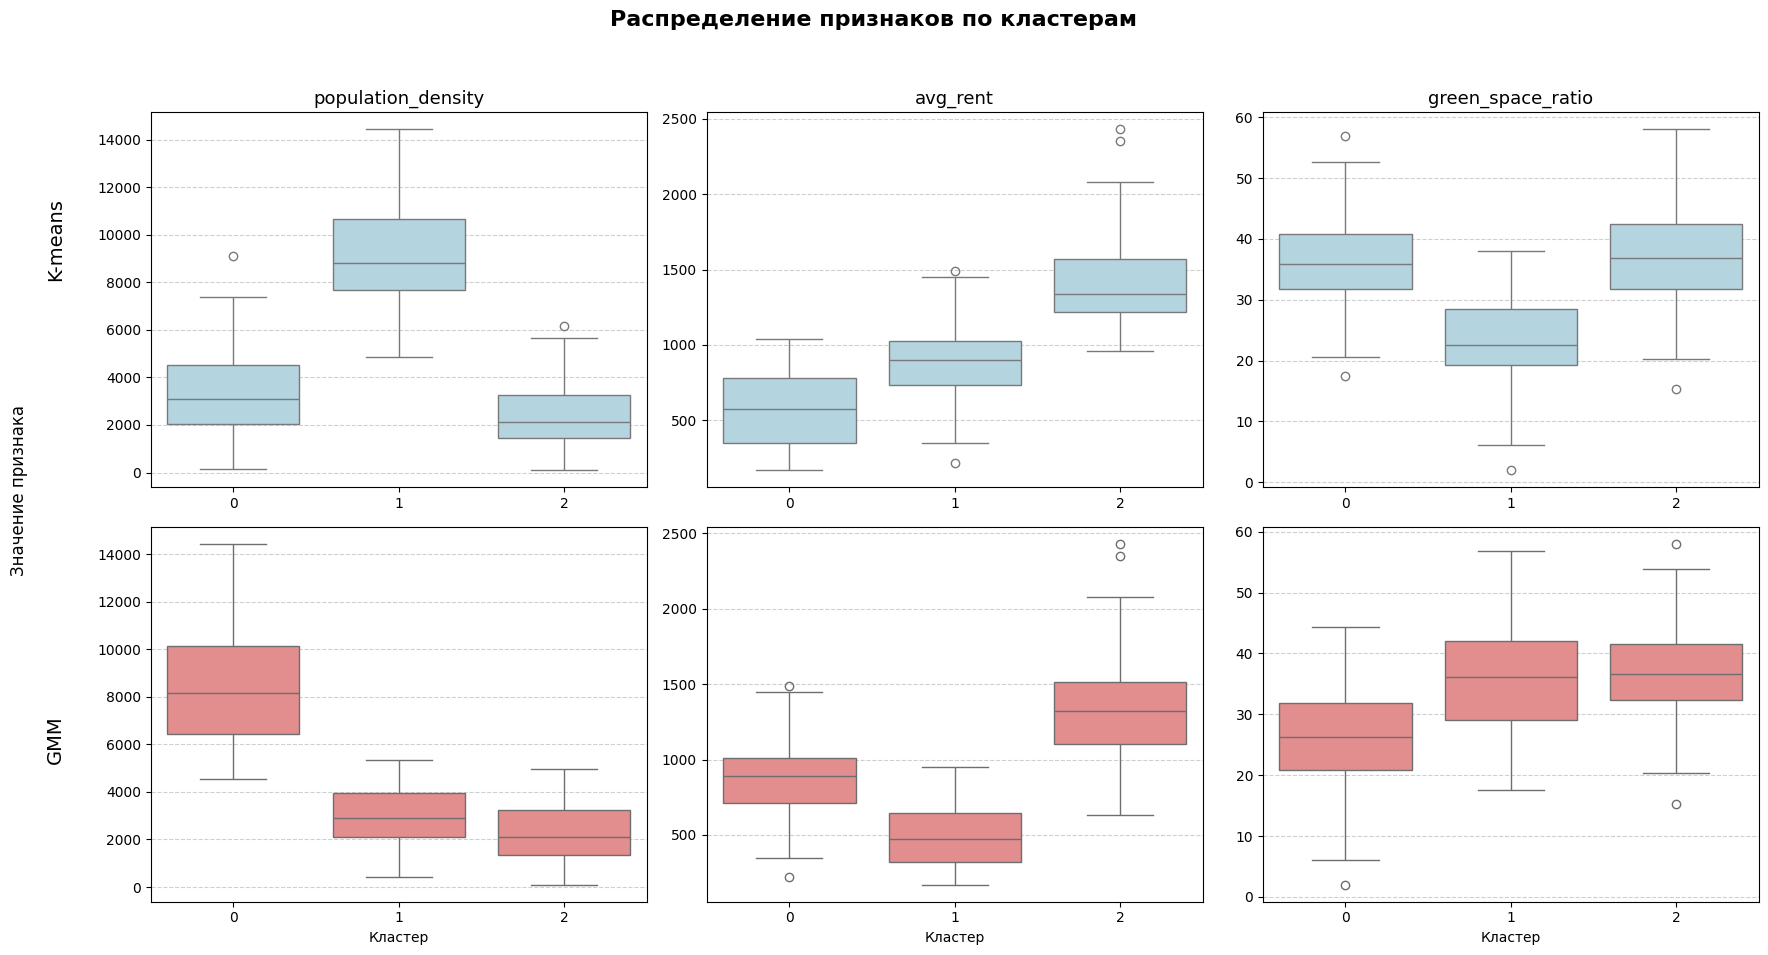

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Подготовка DataFrame'ов
df_km = pd.DataFrame(X_original, columns=feature_names)
df_km['Cluster'] = labels_kmeans.astype(str)

df_gmm = pd.DataFrame(X_original, columns=feature_names)
df_gmm['Cluster'] = labels_gmm.astype(str)

cluster_order = [str(i) for i in range(3)]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Распределение признаков по кластерам', fontsize=16, weight='bold')

fig.text(0.04, 0.75, 'K-means', rotation=90, fontsize=14, va='center')
fig.text(0.04, 0.25, 'GMM', rotation=90, fontsize=14, va='center')

# Построение для K-means (первая строка)
for j, feature in enumerate(feature_names):
    ax = axes[0, j]
    sns.boxplot(data=df_km, x='Cluster', y=feature, order=cluster_order, ax=ax, color='lightblue')
    ax.set_title(feature, fontsize=13)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Построение для GMM (вторая строка)
for j, feature in enumerate(feature_names):
    ax = axes[1, j]
    sns.boxplot(data=df_gmm, x='Cluster', y=feature, order=cluster_order, ax=ax, color='lightcoral')
    ax.set_xlabel('Кластер')
    ax.set_ylabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Общая подпись оси Y
fig.text(0.02, 0.5, 'Значение признака', rotation=90, va='center', fontsize=12)

plt.tight_layout(rect=[0.06, 0.03, 1, 0.95])  # [left, bottom, right, top]
plt.show()

## Визуализация полученных кластеров

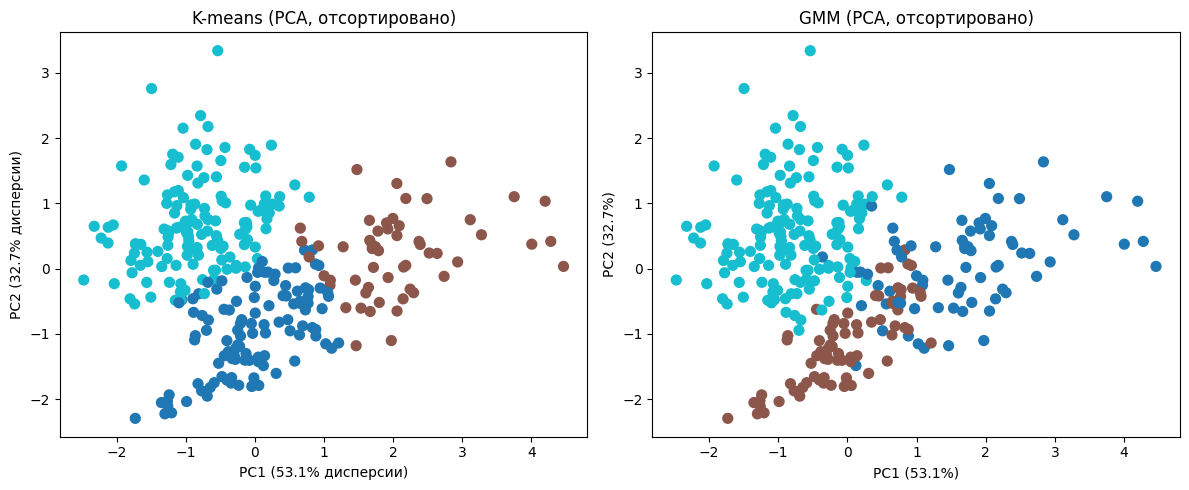

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=50)
plt.title('K-means (PCA, отсортировано)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='tab10', s=50)
plt.title('GMM (PCA, отсортировано)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

plt.tight_layout()
plt.show()

# Заключение
В ходе выполнения лабораторной работы был проведен комплексный статистический и интеллектуальный анализ данных о качестве жизни и инфраструктуре городов. Основные результаты исследования заключаются в следующем:

На этапе разведочного анализа данных (EDA) было выявлено, что ключевые показатели (плотность населения, доходы, стоимость аренды) имеют значительную вариативность, что подтверждает разнообразие городов в выборке. Была проведена нормализация данных (StandardScaler), так как признаки имеют разные единицы измерения (от долей единиц до тысяч), что критично для корректной работы дистанционных алгоритмов.

Анализ корреляционной матрицы выявил сильную взаимосвязь между уровнем дохода, стоимостью аренды и индексом счастья. Для повышения стабильности моделей было принято решение оставить наиболее значимые и независимые признаки (например, population_density, avg_rent и green_space_ratio), что позволило избежать избыточного веса экономических факторов.

С помощью метода локтя (Elbow Method) и анализа коэффициента силуэта (Silhouette Score) для обоих алгоритмов было определено, что наиболее устойчивое и интерпретируемое разделение достигается при k = 3. Выбор этого значения подтверждается как математическими метриками (минимум BIC для GMM и излом графика инерции для K-means), так и содержательной логикой выделяемых сегментов.

Сравнение алгоритмов K-means и GMM:
* K-means продемонстрировал более высокие показатели компактности и разделенности кластеров (Silhouette Score: 0.347, Calinski-Harabasz: 193.0). Алгоритм эффективно выделил сферические группы данных.
* GMM (модель гауссовых смесей) показала сопоставимые, но чуть менее четкие результаты (Silhouette Score: 0.328). Однако GMM позволил более гибко оценить вероятностную принадлежность городов к группам, что полезно при анализе «пограничных» случаев.

В результате кластеризации выделены три фундаментальных типа городов:
* «Экологические центры»: города с умеренной арендой и высоким уровнем озеленения.
* «Перенаселенные мегаполисы»: высокая плотность населения при дефиците зеленых зон.
* «Премиальные локации»: города с максимально высокой стоимостью жизни и высоким уровнем комфорта.

Проверка с помощью теста ANOVA подтвердила высокую значимость всех выбранных признаков в процессе сегментации ($p < 0.05$). Наибольший вклад в разделение городов внесли показатели плотности населения и средней стоимости аренды.
